# **Build and visualize a Decision Tree Classifier using scikit-learn on the Titanic dataset with full analysis, explanations, and visuals**

# 🚢 Titanic Survival Prediction using Decision Tree Classifier

**A Machine Learning Classification Project with Model Visualization and Evaluation**


## 1. 📚 Importing Required Python Libraries

We begin by importing essential libraries used for data manipulation, visualization, and modeling.


In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. 📂 Loading the Titanic Dataset

We'll use the Titanic dataset, which contains information about passengers and whether they survived.


In [3]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# 💡 You can optionally load additional datasets
# Example: Create variations or combine similar ones
data1 = titanic.copy()
data2 = titanic.copy()  # simulate more data

# 📦 Combine datasets (simulate more data)
df = pd.concat([data1, data2], ignore_index=True)


In [4]:
import pandas as pd
df = sns.load_dataset('titanic')
df.to_csv('titanic.csv', index=False)


## 3. 📊 Exploratory Data Analysis (EDA)

Let’s understand the structure of the dataset, check for missing values, and get familiar with key features.


## 4. 🧹 Data Preprocessing

We'll clean and preprocess the dataset — handling missing values, encoding categorical data, and selecting useful features.


In [5]:
#  Clean and preprocess the data
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]
df.dropna(inplace=True)

# Convert categorical to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']


/tmp/ipython-input-3306554097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/tmp/ipython-input-3306554097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'male': 0, 'female': 1})
/tmp/ipython-input-3306554097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

## 5. ✂️ Feature Selection and Train-Test Split

We'll now select relevant features and split the dataset into training and testing sets for model building.


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. 🌲 Training the Decision Tree Classifier

Let’s build and train a Decision Tree model using scikit-learn.


In [7]:
# Train the model
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

## 7. 🤖 Making Predictions on Test Data

We now use the trained model to make predictions on the test dataset.


## 8. 🧪 Model Evaluation

We evaluate the model's performance using accuracy, confusion matrix, and classification report.


In [8]:
#  Make predictions
y_pred = model.predict(X_test)

# 🎯 Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7132867132867133
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76        80
           1       0.72      0.57      0.64        63

    accuracy                           0.71       143
   macro avg       0.71      0.70      0.70       143
weighted avg       0.71      0.71      0.71       143

Confusion Matrix:
 [[66 14]
 [27 36]]


## 🧾 Converting Decision Tree Structure to JSON Format

For better transparency and portability, we convert our trained Decision Tree model's structure and rules into a human-readable **JSON format**. This is useful for:

- 📖 Interpreting the internal logic of the model
- 🔁 Sharing or storing the model structure
- 🧩 Integrating with web apps or other systems

We perform the following steps:
- Extract the decision rules using `export_text()`
- Gather metadata like tree depth and number of leaves
- Save everything into a structured `.json` file


In [9]:
#  Convert model rules to text
tree_rules = export_text(model, feature_names=list(X.columns))

# 📝 Save to JSON format
tree_json = {
    "model_type": "DecisionTreeClassifier",
    "features": list(X.columns),
    "depth": int(model.get_depth()), # Convert to int
    "n_leaves": int(model.get_n_leaves()), # Convert to int
    "rules": tree_rules
}

# 💾 Write to JSON file
with open("titanic_decision_tree.json", "w") as f:
    json.dump(tree_json, f, indent=4)

print("📁 Model structure saved as titanic_decision_tree.json")

📁 Model structure saved as titanic_decision_tree.json


## 🔍 Manual Prediction on Custom Passenger Data

In this step, we simulate a real-world prediction by manually creating a single passenger input and using our trained model to classify whether the passenger would survive.

### 🧾 Input Features:
- Pclass: 3 (Lower class)
- Sex: 0 (Male)
- Age: 22.0 years
- SibSp: 1 (Traveling with one sibling/spouse)
- Parch: 0 (No parents/children aboard)
- Fare: 7.25
- Embarked: 2 (Port Q)

### 🎯 Goal:
Make a survival prediction for this synthetic passenger based on the trained decision tree model.


In [10]:
#  Predict manually
sample = pd.DataFrame([[3, 0, 22.0, 1, 0, 7.25, 2]], columns=X.columns)
prediction = model.predict(sample)

print("🎯 Prediction:", "Survived" if prediction[0] == 1 else "Not Survived")


🎯 Prediction: Not Survived


## 🌲 Training the Decision Tree Classifier

Now that the data is preprocessed and split, we proceed to train our machine learning model.

### 🔧 Model Used:
- **Algorithm:** Decision Tree Classifier
- **Library:** `scikit-learn`
- **Purpose:** To classify whether a Titanic passenger survived or not based on selected features.

The `fit()` method is used to train the model on our training dataset (`X_train`, `y_train`).


In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

## 🛠 Installing Visualization Libraries (Graphviz & Pydotplus)

To visualize the trained decision tree in graphical format, we need two external libraries:

- **`graphviz`**: Renders the tree structure as a graph.
- **`pydotplus`**: Interfaces with Graphviz and generates the visual output from the decision tree.

These tools allow us to export a beautiful and interpretable tree diagrams.

🔽 Installing required libraries using pip:


In [12]:
!pip install graphviz pydotplus


## 🖼️ Importing Visualization Tools for Decision Tree Rendering

Now we import the necessary functions and modules to visualize the trained Decision Tree in both:

- 🧱 Text-based format (`plot_tree`)
- 🌐 Graph-based format (`Graphviz` via `pydotplus`)

### 🧩 Tools Used:
- `export_graphviz`: Converts the tree into DOT language (Graphviz format)
- `plot_tree`: Quick matplotlib-based tree visualization
- `pydotplus`: Converts DOT data to image
- `Image`, `StringIO`: To display image directly in the notebook

These tools help us **graphically understand the decision-making process** of our model.


In [13]:
from sklearn.tree import export_graphviz, plot_tree
import graphviz
import pydotplus
from IPython.display import Image
from io import StringIO


## 🌳 Visualizing the Decision Tree using Matplotlib

We now generate a **graphical representation** of our trained Decision Tree using `plot_tree()` from scikit-learn and `matplotlib`.

### 🧠 What This Visualization Shows:
- **Decision nodes** based on feature splits (e.g., Age, Fare)
- **Leaf nodes** showing predicted outcomes
- **Color intensity** indicating class purity (how confidently the model classifies)

### 📌 Customization:
- `feature_names`: Shows which feature is used at each split
- `class_names`: Human-readable output labels ("Survived", "Not Survived")
- `filled=True`: Colors nodes based on the class
- `rounded=True`: Rounded corners for better readability

This tree helps us interpret how the model makes predictions for Titanic passengers.


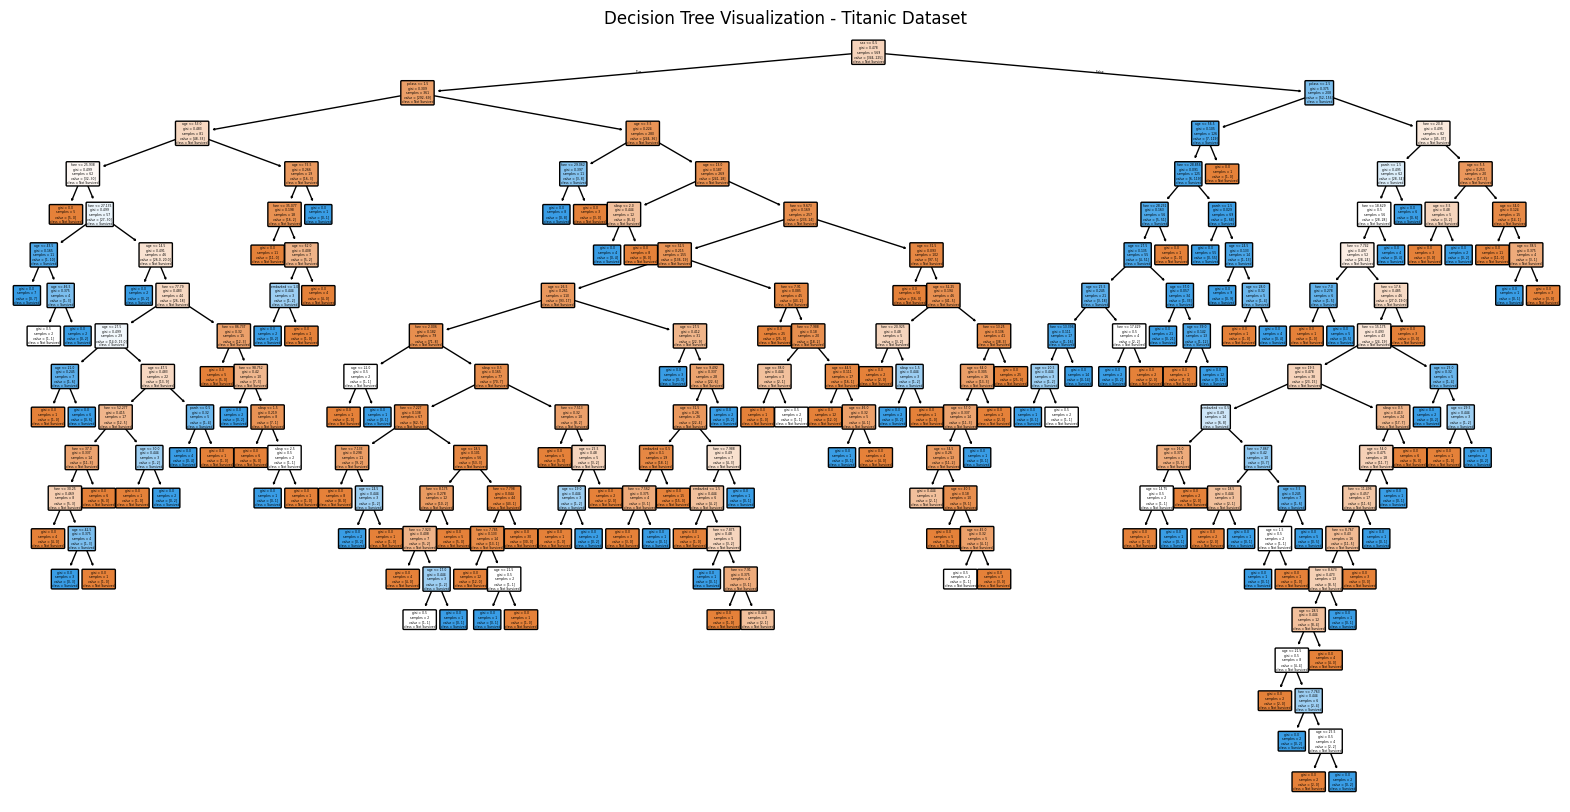

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization - Titanic Dataset")
plt.show()


## 🖼️ Exporting and Displaying Decision Tree with Graphviz

We now generate a **high-quality image** of the trained Decision Tree using Graphviz via `pydotplus`.

### ⚙️ Steps Performed:
1. **Convert the trained model into DOT format** (Graphviz language) using `export_graphviz()`
2. **Parse the DOT data** using `pydotplus` to create a graph object
3. **Save the tree as a `.png` image** for future use or documentation
4. **Display the image inline** inside the notebook using `IPython.display.Image`

This method provides a **more polished and publication-quality visualization** compared to `plot_tree()`.


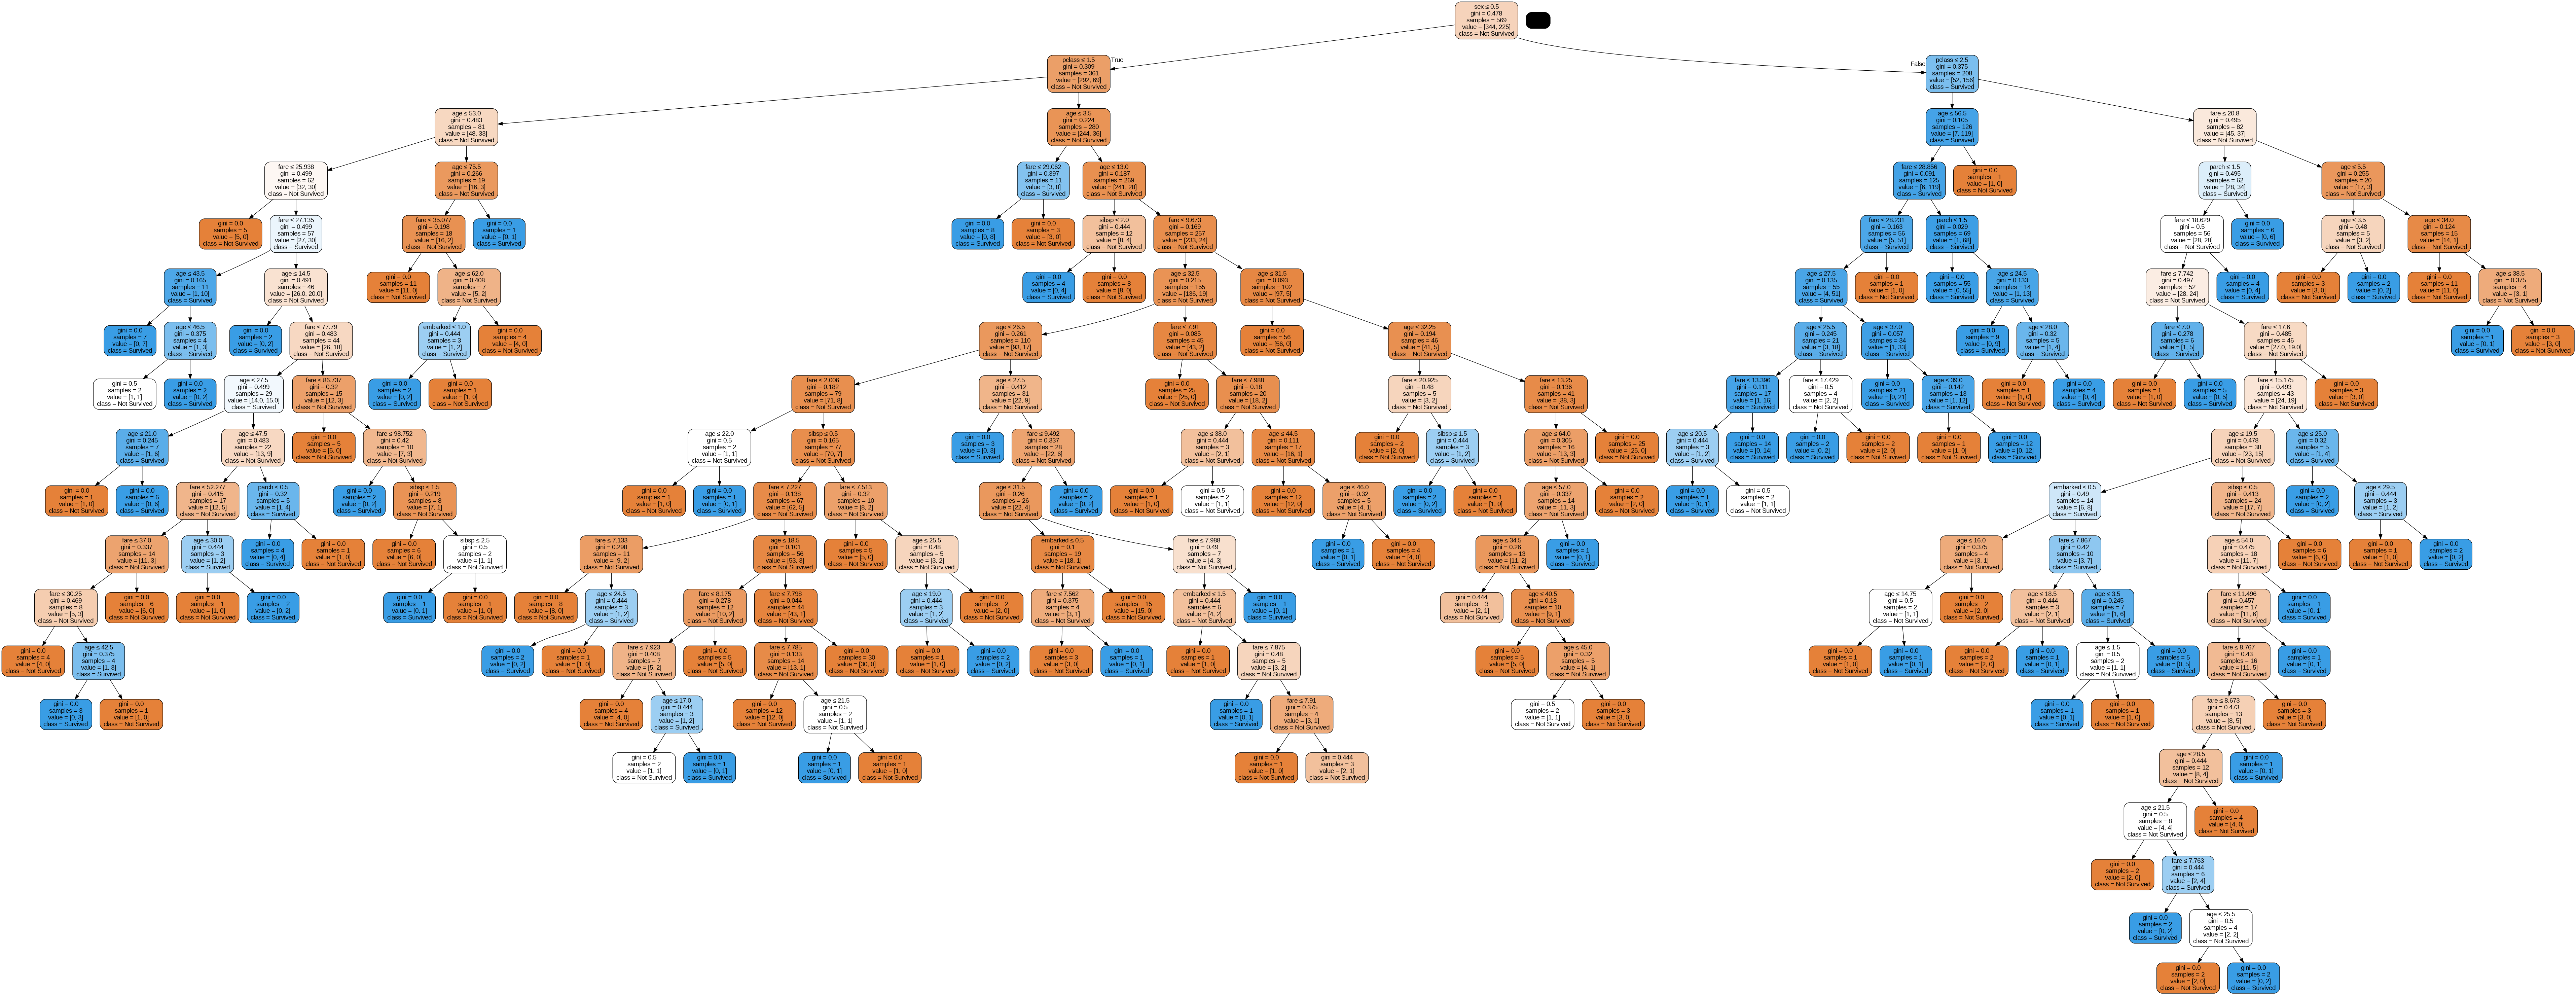

In [15]:
dot_data = StringIO()

# Export tree in DOT format
export_graphviz(model,
                out_file=dot_data,
                feature_names=X.columns,
                class_names=["Not Survived", "Survived"],
                filled=True, rounded=True,
                special_characters=True)

# Generate graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save PNG image
graph.write_png("titanic_decision_tree.png")

# Display image inside notebook
Image("titanic_decision_tree.png")


## 💾 Saving the Trained Model using Joblib

To preserve our trained Decision Tree model for future use, we serialize it using `joblib`.

### ✅ Why Save the Model?
- Reuse without retraining
- Easy deployment to web apps or APIs
- Shareable and portable format

### 🔐 Output File:
- The model will be saved as a binary file: `decision_tree_model.pkl`

This file can later be loaded using `joblib.load()` for predictions or deployment.


In [16]:
import joblib
joblib.dump(model, "decision_tree_model.pkl")


['decision_tree_model.pkl']

## 🔁 Loading the Saved Model and Making a Prediction

Now that the model has been saved as a `.pkl` file, we can load it anytime to make new predictions without retraining.

### 🧩 Steps:
1. **Load** the model using `joblib.load()`
2. **Create a sample input** in the correct feature order using `pandas.DataFrame`
3. **Make prediction** on the input data
4. **Display the result** for interpretation

This simulates how the model would behave in a real-world application scenario.

### 🧠 Sample Input:
```plaintext
Pclass: 3 (Lower class)
Sex: 0 (Male)
Age: 25
SibSp: 0
Parch: 0
Fare: 7.25
Embarked: 2 (Port Q)



In [17]:
import joblib
import pandas as pd

model = joblib.load("decision_tree_model.pkl")

# Define the same feature order
feature_order = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

# Create a DataFrame from input data
input_df = pd.DataFrame([[3, 0, 25, 0, 0, 7.25, 2]], columns=feature_order)

# Make prediction
prediction = model.predict(input_df)
print("Prediction:", prediction[0])


Prediction: 0


## 📊 Batch Predictions on Multiple Passengers

We now test our trained Decision Tree model on a batch of new passenger records.

### 🧾 Input:
A list of multiple passengers with the same features used during training:
- `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`

### 🎯 Output:
- Raw prediction (`0` = Not Survived, `1` = Survived)
- Human-readable label (`Survived` / `Not Survived`)

This simulates how the model might be used in real-world applications to process multiple cases at once.


In [18]:
import joblib
import pandas as pd

# Load saved model
model = joblib.load("decision_tree_model.pkl")

# Define input feature order
feature_order = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

# Create a DataFrame for multiple passengers
batch_data = pd.DataFrame([
    [3, 0, 22.0, 1, 0, 7.25, 2],   # Male, 3rd class
    [1, 1, 38.0, 1, 0, 71.2833, 0],# Female, 1st class
    [3, 1, 26.0, 0, 0, 7.925, 2],  # Female, 3rd class
    [1, 0, 35.0, 0, 0, 53.1, 0],   # Male, 1st class
    [2, 1, 28.0, 0, 0, 13.0, 1]    # Female, 2nd class
], columns=feature_order)

# Predict survival for all passengers
predictions = model.predict(batch_data)

# Add readable results
batch_data["Prediction"] = predictions
batch_data["Result"] = batch_data["Prediction"].apply(lambda x: "Survived" if x == 1 else "Not Survived")

# Display the batch results
print(batch_data)


   pclass  sex   age  sibsp  parch     fare  embarked  Prediction  \
0       3    0  22.0      1      0   7.2500         2           0   
1       1    1  38.0      1      0  71.2833         0           1   
2       3    1  26.0      0      0   7.9250         2           1   
3       1    0  35.0      0      0  53.1000         0           1   
4       2    1  28.0      0      0  13.0000         1           1   

         Result  
0  Not Survived  
1      Survived  
2      Survived  
3      Survived  
4      Survived  


In [19]:
# Save batch predictions to CSV
batch_data.to_csv("predictions_sample.csv", index=False)
print("✅ Predictions saved as predictions_sample.csv")


✅ Predictions saved as predictions_sample.csv


---

## 👨‍💻 Project Created By --

**🧠 MAYANK PRATAP SINGH**  
_ML Intern at Code Tech IT Solution_  
_Self-Taught Developer | Passionate about Machine Learning, AI & Real-World Problem Solving_

*“Turning data into decisions with code and creativity.”*
